In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/processed_data.csv")

##EDA

In [3]:
df.head()

,Timestamp,Frame Index,Distance Left Shoulder-Elbow,Distance Left Elbow-Wrist,Distance Right Shoulder-Elbow,Distance Right Elbow-Wrist,Distance Left Hip-Knee,Distance Left Knee-Ankle,Distance Right Hip-Knee,Distance Right Knee-Ankle,Angle Left Shoulder-Elbow-Wrist,Angle Right Shoulder-Elbow-Wrist,Angle Left Knee-Hip-Ankle,Angle Left Hip-Knee-Ankle,Exercise
0,279,279,0.085034,0.074858,0.065121,0.028063,0.167674,0.187288,0.178134,0.177373,51.102403,71.731519,3.558079,186.743125,squats
1,384,384,0.089940,0.094560,0.053066,0.050543,0.177306,0.125133,0.177345,0.154837,50.711766,69.695949,3.735354,189.031931,squats
2,441,441,0.125847,0.114160,0.086740,0.110339,0.187838,0.130696,0.169922,0.157338,39.554217,39.620108,4.698524,191.459435,squats
3,364,364,0.131034,0.123384,0.101588,0.110377,0.245862,0.170782,0.225467,0.184607,36.610998,35.011477,2.086335,174.909412,squats
4,419,419,0.066594,0.035716,0.047961,0.064127,0.160684,0.134685,0.146012,0.139425,141.607021,55.278257,1.372977,183.011055,squats


In [4]:
df.describe()

,Timestamp,Frame Index,Distance Left Shoulder-Elbow,Distance Left Elbow-Wrist,Distance Right Shoulder-Elbow,Distance Right Elbow-Wrist,Distance Left Hip-Knee,Distance Left Knee-Ankle,Distance Right Hip-Knee,Distance Right Knee-Ankle,Angle Left Shoulder-Elbow-Wrist,Angle Right Shoulder-Elbow-Wrist,Angle Left Knee-Hip-Ankle,Angle Left Hip-Knee-Ankle
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,490.958371,490.958371,0.116974,0.111353,0.110180,0.109396,0.152726,0.145729,0.160083,0.133059,151.377393,136.887511,9.910201,177.955686
std,302.390003,302.390003,0.044292,0.045099,0.042210,0.045719,0.043084,0.046799,0.044076,0.045021,67.933447,60.793670,20.541134,35.546577
min,0.000000,0.000000,0.006552,0.003068,0.005735,0.003731,0.001973,0.002003,0.001190,0.001036,1.766854,0.170880,0.000229,0.885609
25%,235.000000,235.000000,0.090552,0.088524,0.083715,0.085499,0.134293,0.123387,0.146159,0.107397,87.621843,77.089422,1.174147,173.342838
50%,463.500000,463.500000,0.112124,0.106167,0.108590,0.103172,0.157599,0.159048,0.160189,0.140015,180.282440,169.457842,3.595651,179.371470
75%,724.000000,724.000000,0.138554,0.120009,0.135235,0.133192,0.173791,0.182140,0.179079,0.164136,190.518646,178.040159,9.334885,188.677150
max,1131.000000,1131.000000,0.292242,0.306297,0.286076,0.296407,0.368942,0.339535,0.344170,0.331509,272.498737,281.347630,336.702175,309.389671


##Data augmentation

In [5]:
def augment_data(df):
    augmented_data = []

    for index, row in df.iterrows():
        augmented_row = {}

       # Scaling
        scaling_factor = np.random.uniform(0.9, 1.1)
        augmented_row['Distance Left Shoulder-Elbow'] = row['Distance Left Shoulder-Elbow'] * scaling_factor
        augmented_row['Distance Left Elbow-Wrist'] = row['Distance Left Elbow-Wrist'] * scaling_factor
        augmented_row['Distance Right Shoulder-Elbow'] = row['Distance Right Shoulder-Elbow'] * scaling_factor
        augmented_row['Distance Right Elbow-Wrist'] = row['Distance Right Elbow-Wrist'] * scaling_factor
        augmented_row['Distance Left Hip-Knee'] = row['Distance Left Hip-Knee'] * scaling_factor
        augmented_row['Distance Left Knee-Ankle'] = row['Distance Left Knee-Ankle'] * scaling_factor
        augmented_row['Distance Right Hip-Knee'] = row['Distance Right Hip-Knee'] * scaling_factor
        augmented_row['Distance Right Knee-Ankle'] = row['Distance Right Knee-Ankle'] * scaling_factor

        #translation
        translation_offset = np.random.uniform(-0.1, 0.1)
        augmented_row['Distance Left Shoulder-Elbow'] += translation_offset
        augmented_row['Distance Left Elbow-Wrist'] += translation_offset
        augmented_row['Distance Right Shoulder-Elbow'] += translation_offset
        augmented_row['Distance Right Elbow-Wrist'] += translation_offset
        augmented_row['Distance Left Hip-Knee'] += translation_offset
        augmented_row['Distance Left Knee-Ankle'] += translation_offset
        augmented_row['Distance Right Hip-Knee'] += translation_offset
        augmented_row['Distance Right Knee-Ankle'] += translation_offset

        #Gaussian Noise
        noise_mean = 0
        noise_std = 0.05
        augmented_row['Distance Left Shoulder-Elbow'] += np.random.normal(noise_mean, noise_std)
        augmented_row['Distance Left Elbow-Wrist'] += np.random.normal(noise_mean, noise_std)
        augmented_row['Distance Right Shoulder-Elbow'] += np.random.normal(noise_mean, noise_std)
        augmented_row['Distance Right Elbow-Wrist'] += np.random.normal(noise_mean, noise_std)
        augmented_row['Distance Left Hip-Knee'] += np.random.normal(noise_mean, noise_std)
        augmented_row['Distance Left Knee-Ankle'] += np.random.normal(noise_mean, noise_std)
        augmented_row['Distance Right Hip-Knee'] += np.random.normal(noise_mean, noise_std)
        augmented_row['Distance Right Knee-Ankle'] += np.random.normal(noise_mean, noise_std)


        augmented_row['Angle Left Shoulder-Elbow-Wrist'] = row['Angle Left Shoulder-Elbow-Wrist'] + np.random.uniform(-5, 5)
        augmented_row['Angle Right Shoulder-Elbow-Wrist'] = row['Angle Right Shoulder-Elbow-Wrist'] + np.random.uniform(-5, 5)
        augmented_row['Angle Left Knee-Hip-Ankle'] = row['Angle Left Knee-Hip-Ankle'] + np.random.uniform(-5, 5)
        augmented_row['Angle Left Hip-Knee-Ankle'] = row['Angle Left Hip-Knee-Ankle'] + np.random.uniform(-5, 5)


        augmented_row['Exercise'] = row['Exercise']

        # Appending augmented row to list
        augmented_data.append(augmented_row)

    return pd.DataFrame(augmented_data)

augmented_df = augment_data(df)

# Save augmented DataFrame back to CSV
augmented_df.to_csv('augmented_feature_dataset.csv', index=False)


In [6]:
df2 = pd.read_csv("/content/augmented_feature_dataset.csv")

In [7]:
df2.head()

,Distance Left Shoulder-Elbow,Distance Left Elbow-Wrist,Distance Right Shoulder-Elbow,Distance Right Elbow-Wrist,Distance Left Hip-Knee,Distance Left Knee-Ankle,Distance Right Hip-Knee,Distance Right Knee-Ankle,Angle Left Shoulder-Elbow-Wrist,Angle Right Shoulder-Elbow-Wrist,Angle Left Knee-Hip-Ankle,Angle Left Hip-Knee-Ankle,Exercise
0,0.228106,0.112399,0.204039,0.056744,0.225248,0.142753,0.153379,0.237899,46.661239,72.039809,6.709167,185.287451,squats
1,-0.041468,-0.006069,-0.048687,-0.036719,0.098488,0.055254,0.046888,0.018800,50.482895,65.008601,6.959905,191.399785,squats
2,0.009509,0.003367,0.077767,0.097515,0.110491,0.056230,0.066672,-0.078631,40.317657,42.871467,5.903028,192.926735,squats
3,0.185474,0.214602,0.115575,0.172455,0.342495,0.230047,0.263090,0.256526,39.702016,37.959219,-1.387479,177.092370,squats
4,0.090707,0.127767,0.039531,0.021273,0.209819,0.077951,0.192979,0.144604,138.063124,57.280488,2.617104,178.873633,squats


In [8]:
df2.describe()

,Distance Left Shoulder-Elbow,Distance Left Elbow-Wrist,Distance Right Shoulder-Elbow,Distance Right Elbow-Wrist,Distance Left Hip-Knee,Distance Left Knee-Ankle,Distance Right Hip-Knee,Distance Right Knee-Ankle,Angle Left Shoulder-Elbow-Wrist,Angle Right Shoulder-Elbow-Wrist,Angle Left Knee-Hip-Ankle,Angle Left Hip-Knee-Ankle
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,0.118534,0.112645,0.111220,0.110250,0.154915,0.146691,0.160865,0.134218,151.360221,136.845281,9.934684,177.941249
std,0.088879,0.088633,0.086388,0.087807,0.088476,0.090422,0.088674,0.090421,68.030521,60.880535,20.732504,35.647957
min,-0.151589,-0.196127,-0.201929,-0.139456,-0.164812,-0.184003,-0.172016,-0.167787,-2.984746,2.426128,-4.897990,-3.256712
25%,0.055996,0.049732,0.050581,0.047952,0.092950,0.085376,0.100927,0.071555,87.609555,76.778436,1.002604,172.652904
50%,0.117683,0.111874,0.110492,0.109523,0.156594,0.147879,0.161286,0.135060,179.634895,168.125224,4.555477,179.980933
75%,0.181608,0.172182,0.171849,0.170161,0.216773,0.210351,0.222886,0.198134,191.107859,178.168801,10.053496,188.970004
max,0.459141,0.432214,0.457269,0.443458,0.476003,0.423402,0.456731,0.399566,276.392950,283.017736,338.951764,306.239915


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Distance Left Shoulder-Elbow      4372 non-null   float64
 1   Distance Left Elbow-Wrist         4372 non-null   float64
 2   Distance Right Shoulder-Elbow     4372 non-null   float64
 3   Distance Right Elbow-Wrist        4372 non-null   float64
 4   Distance Left Hip-Knee            4372 non-null   float64
 5   Distance Left Knee-Ankle          4372 non-null   float64
 6   Distance Right Hip-Knee           4372 non-null   float64
 7   Distance Right Knee-Ankle         4372 non-null   float64
 8   Angle Left Shoulder-Elbow-Wrist   4372 non-null   float64
 9   Angle Right Shoulder-Elbow-Wrist  4372 non-null   float64
 10  Angle Left Knee-Hip-Ankle         4372 non-null   float64
 11  Angle Left Hip-Knee-Ankle         4372 non-null   float64
 12  Exerci

In [10]:
df2.shape

(4372, 13)

In [11]:
df2.isnull().sum()

Distance Left Shoulder-Elbow        0
Distance Left Elbow-Wrist           0
Distance Right Shoulder-Elbow       0
Distance Right Elbow-Wrist          0
Distance Left Hip-Knee              0
Distance Left Knee-Ankle            0
Distance Right Hip-Knee             0
Distance Right Knee-Ankle           0
Angle Left Shoulder-Elbow-Wrist     0
Angle Right Shoulder-Elbow-Wrist    0
Angle Left Knee-Hip-Ankle           0
Angle Left Hip-Knee-Ankle           0
Exercise                            0
dtype: int64

##Data Visualization

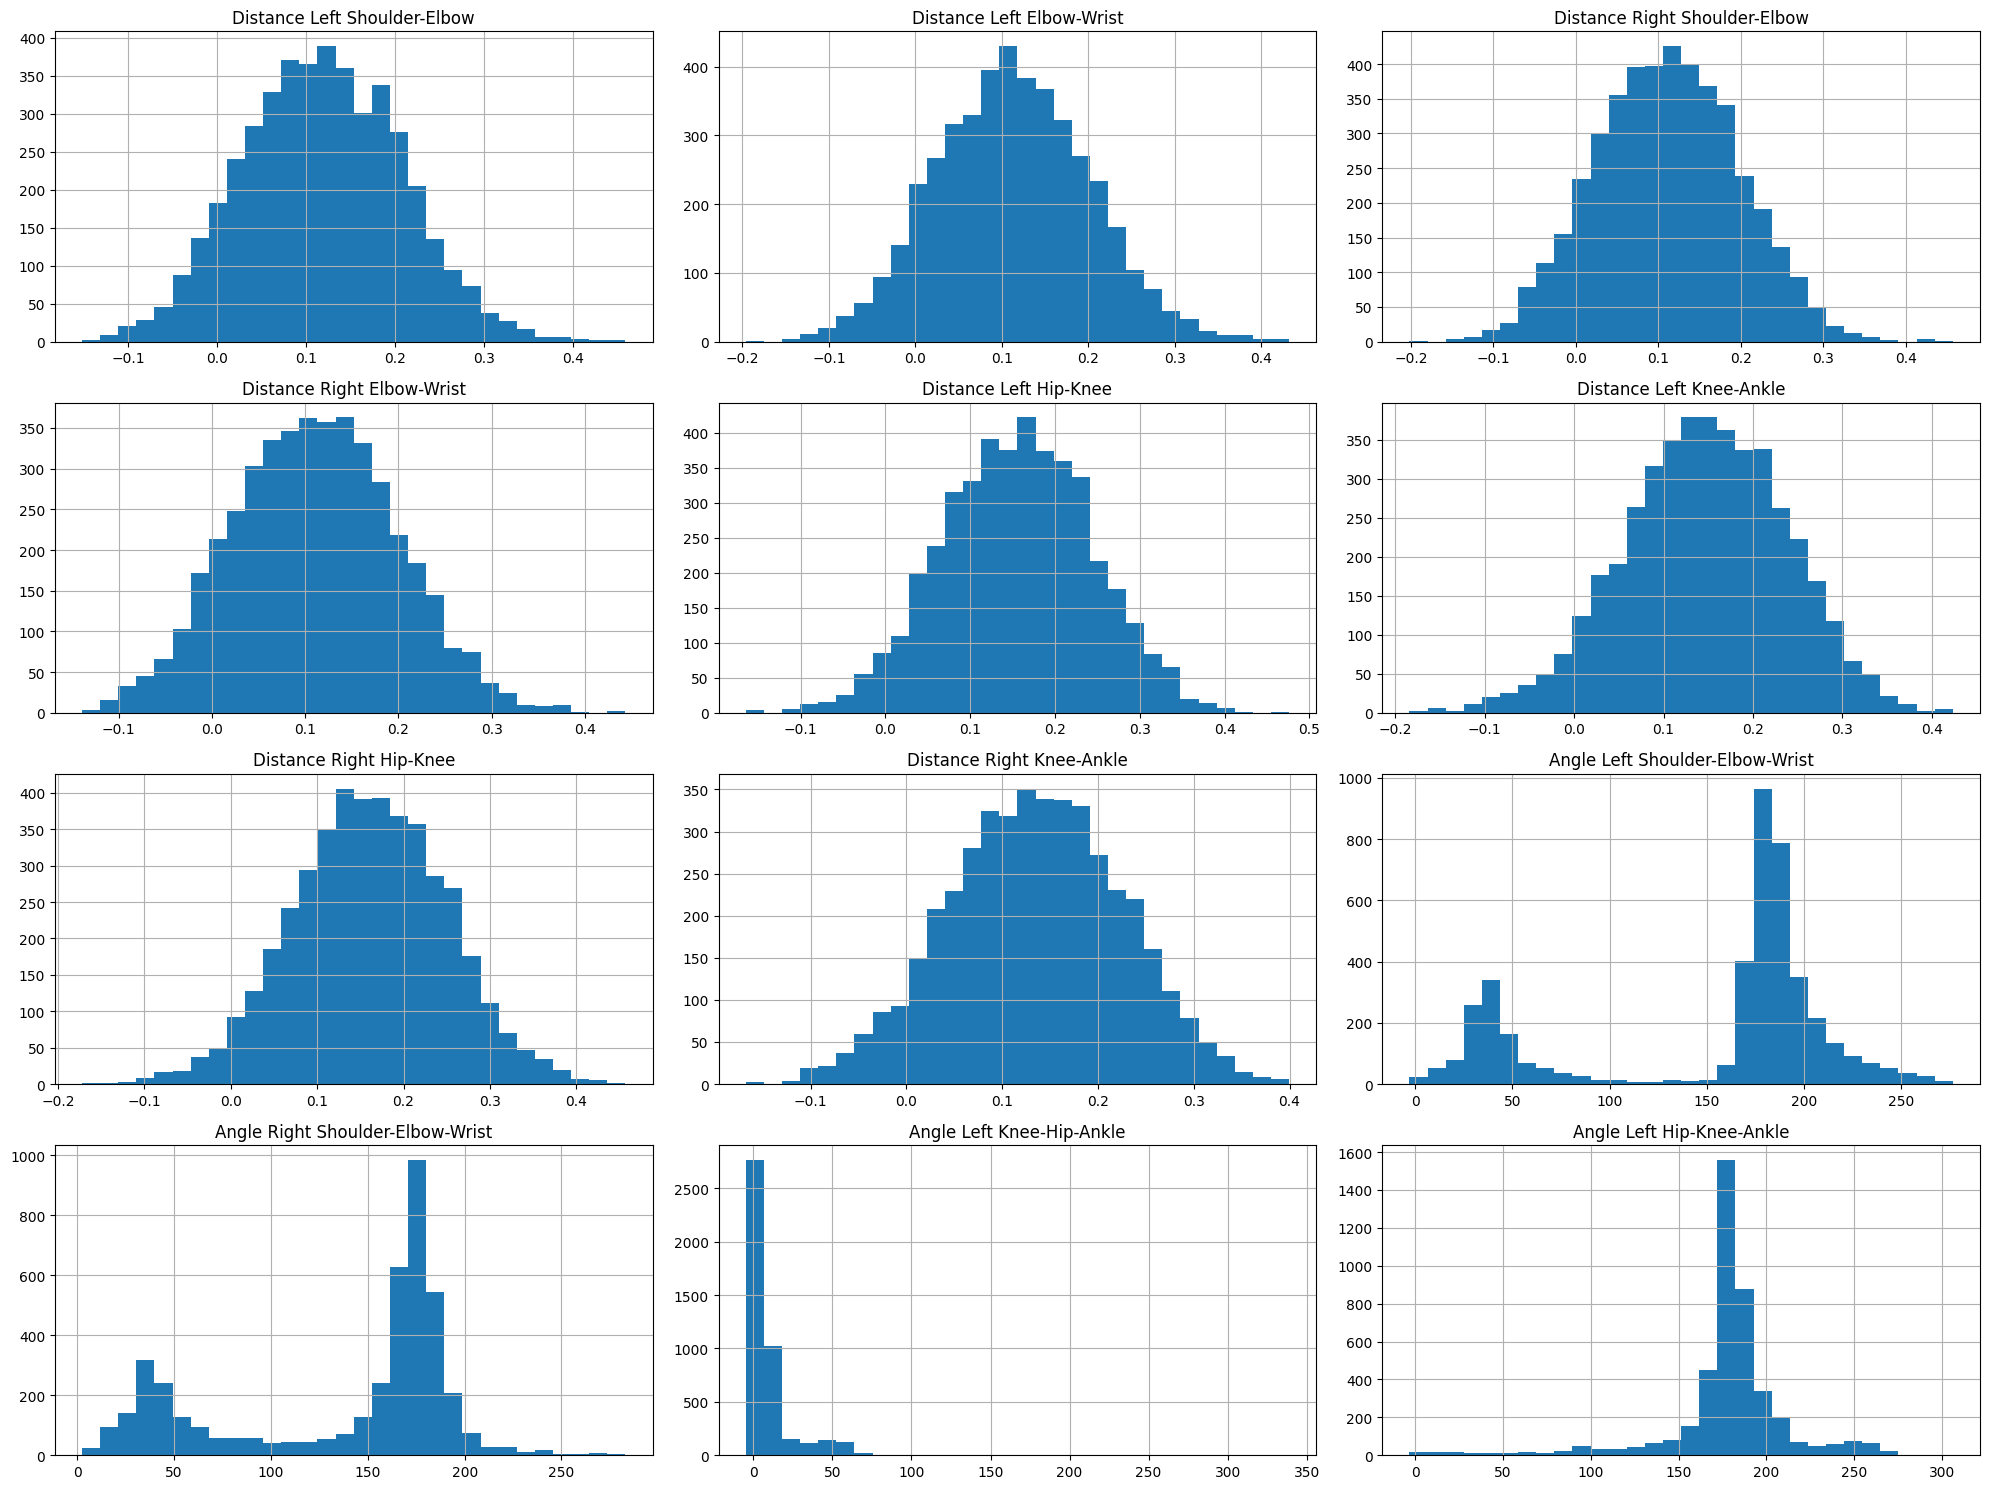

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df2.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

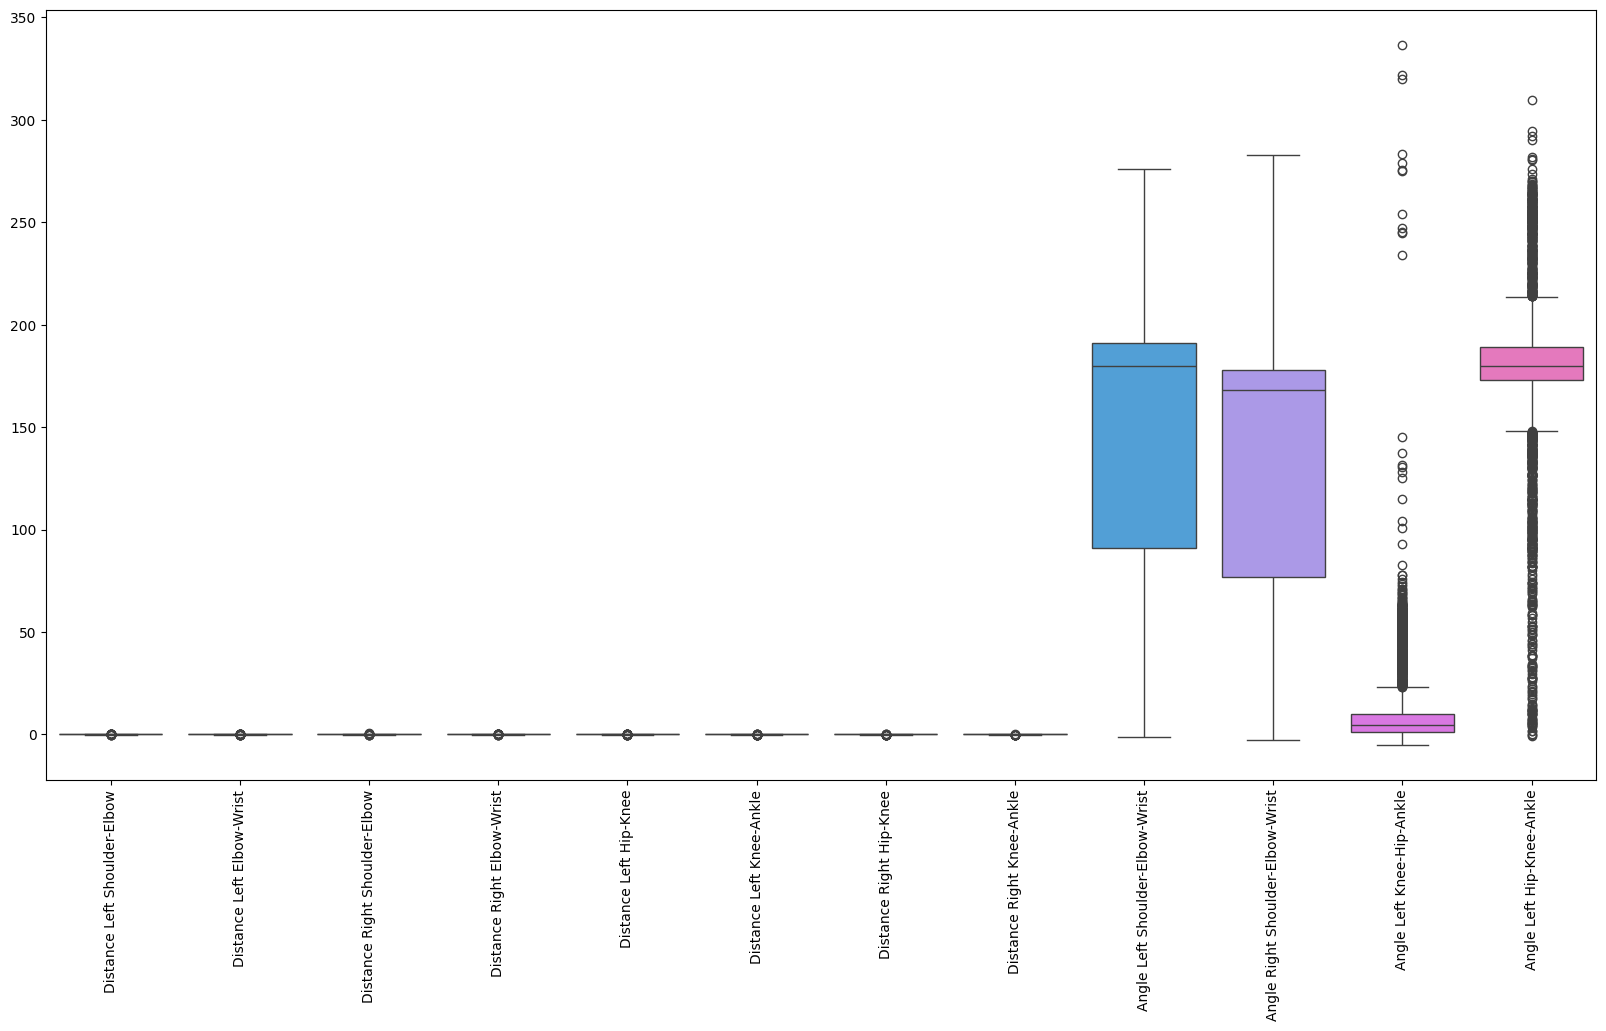

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()

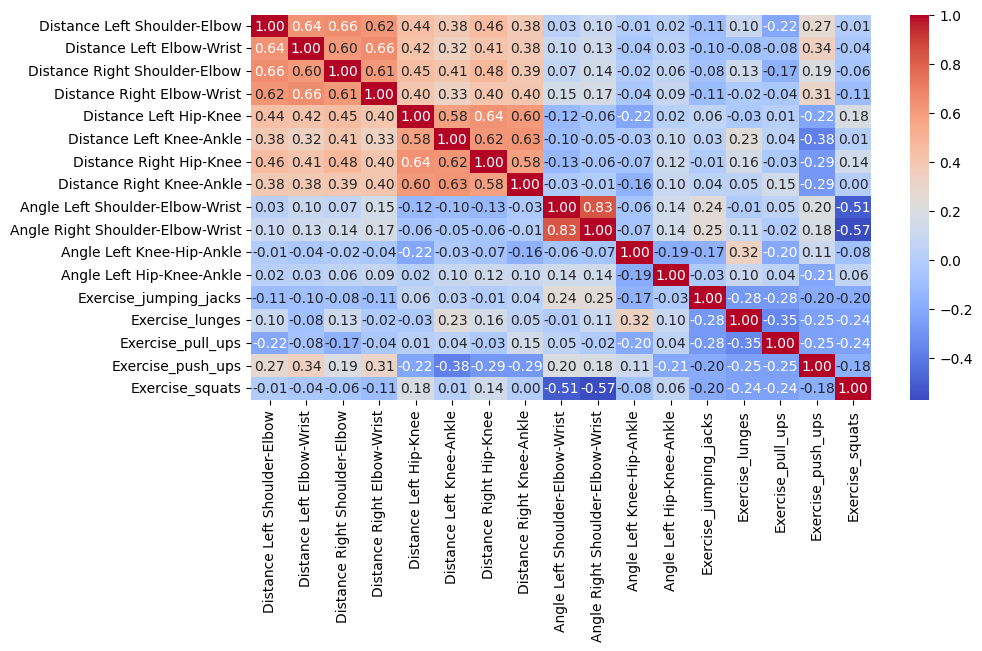

In [13]:

df2_encoded = pd.get_dummies(df2, columns=['Exercise'])

correlation_matrix = df2_encoded.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<ipython-input-14-7be328b543ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exercise_counts.index, y=exercise_counts.values, palette='viridis')


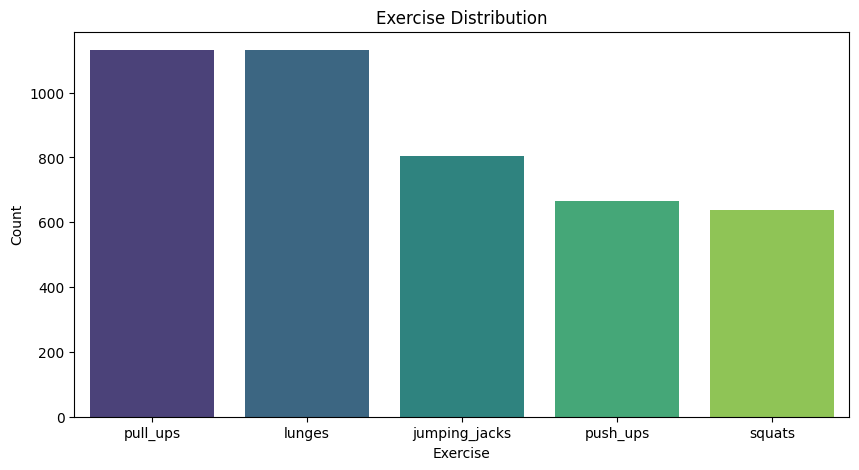

In [14]:
exercise_counts = df2['Exercise'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=exercise_counts.index, y=exercise_counts.values, palette='viridis')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.title('Exercise Distribution')
plt.show()

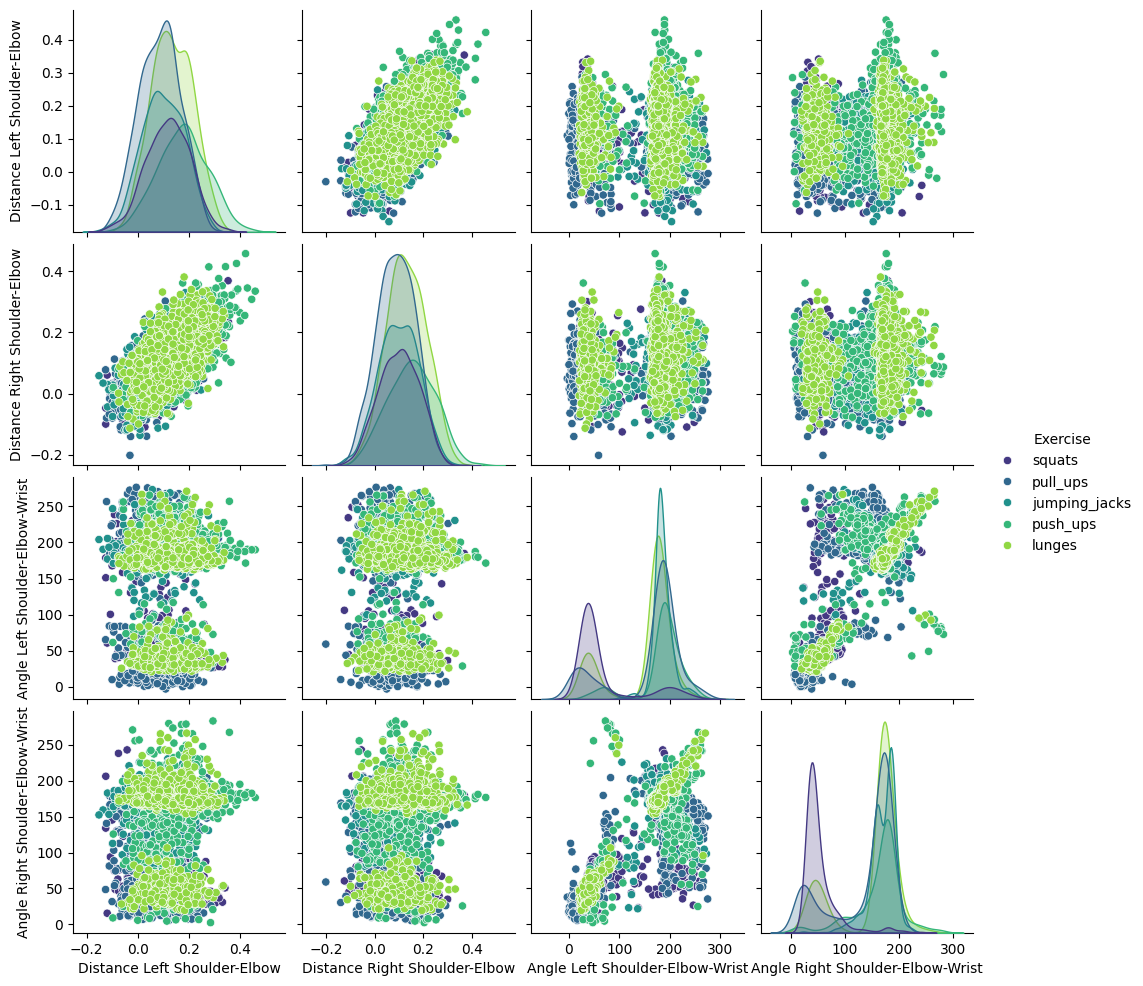

In [15]:
# Pair plot for a subset of features
subset_features = ['Distance Left Shoulder-Elbow', 'Distance Right Shoulder-Elbow', 'Angle Left Shoulder-Elbow-Wrist', 'Angle Right Shoulder-Elbow-Wrist', 'Exercise']
sns.pairplot(df2[subset_features], hue='Exercise', palette='viridis')
plt.show()

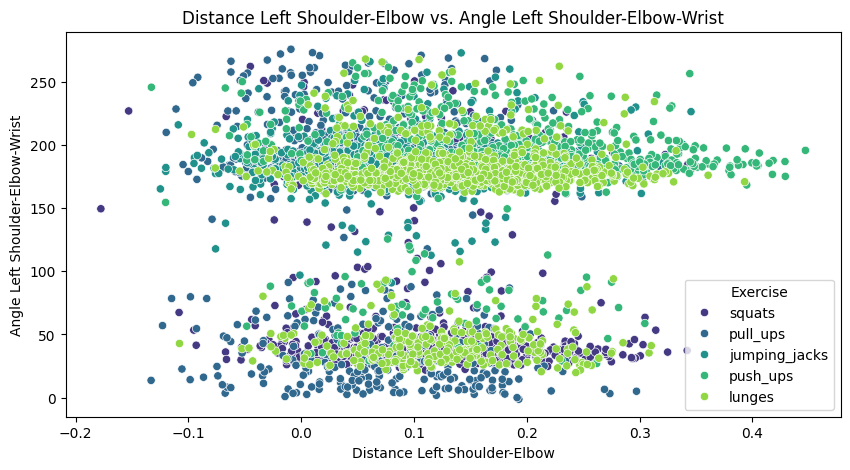

In [ ]:
# Scatter plot for specific feature relationships
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df2, x='Distance Left Shoulder-Elbow', y='Angle Left Shoulder-Elbow-Wrist', hue='Exercise', palette='viridis')
plt.title('Distance Left Shoulder-Elbow vs. Angle Left Shoulder-Elbow-Wrist')
plt.show()

##Detecting the outliers

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

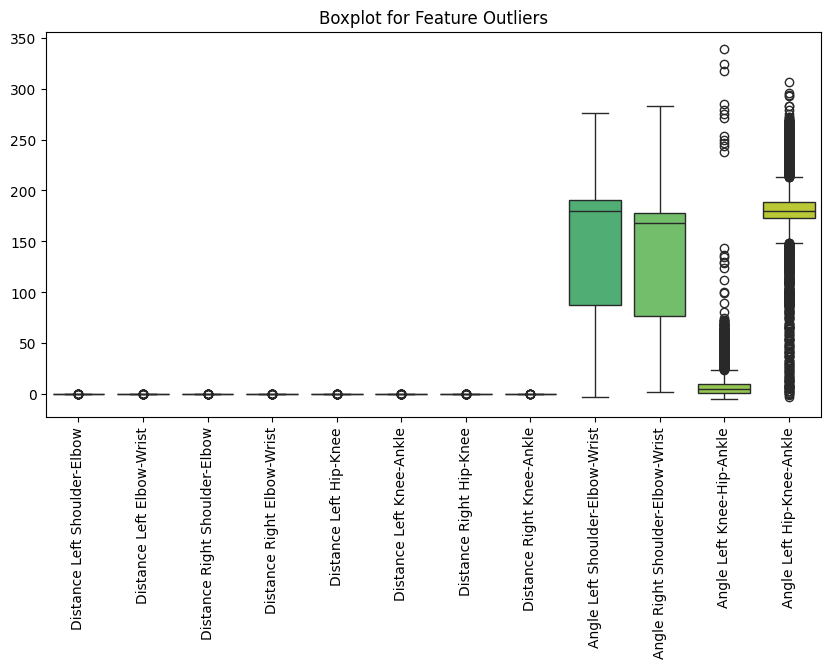

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df2, palette='viridis')
plt.xticks(rotation=90)
plt.title('Boxplot for Feature Outliers')
plt.show()

In [18]:
data = df2

In [19]:
from sklearn.preprocessing import RobustScaler

In [20]:
features = ['Distance Left Shoulder-Elbow', 'Distance Left Elbow-Wrist',
            'Distance Right Shoulder-Elbow', 'Distance Right Elbow-Wrist',
            'Distance Left Hip-Knee', 'Distance Left Knee-Ankle',
            'Distance Right Hip-Knee', 'Distance Right Knee-Ankle',
            'Angle Left Shoulder-Elbow-Wrist', 'Angle Right Shoulder-Elbow-Wrist',
            'Angle Left Knee-Hip-Ankle', 'Angle Left Hip-Knee-Ankle']

# Initialize the RobustScaler
scaler = RobustScaler()
data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data[features])

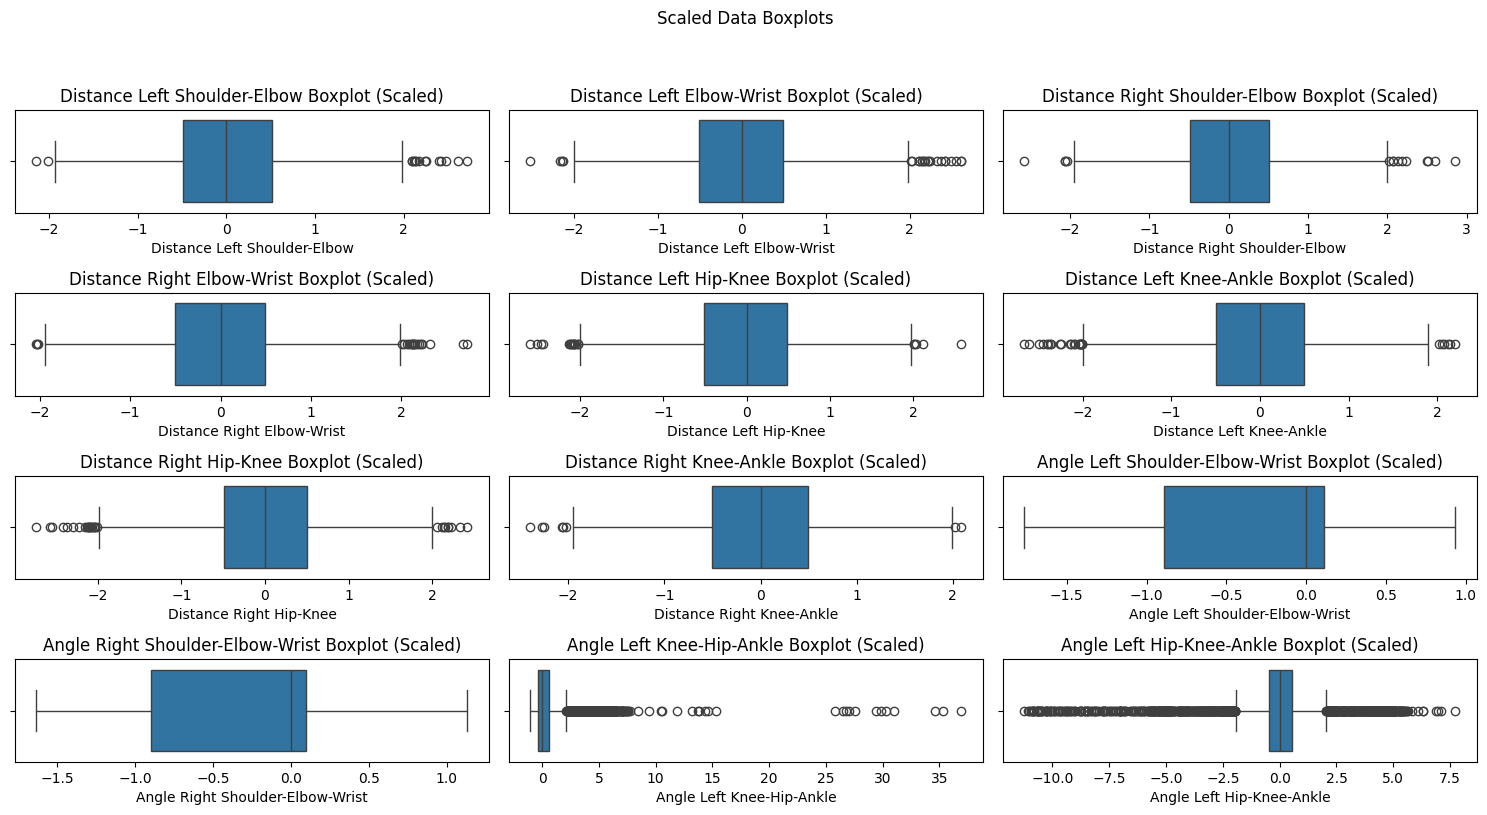

In [22]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(len(features)//3 + 1, 3, i+1)
    sns.boxplot(x=data_scaled[feature])
    plt.title(f'{feature} Boxplot (Scaled)')
plt.suptitle('Scaled Data Boxplots')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [24]:
columns_to_check = ['Distance Left Shoulder-Elbow', 'Distance Left Elbow-Wrist',
                    'Distance Right Shoulder-Elbow', 'Distance Right Elbow-Wrist',
                    'Distance Left Hip-Knee', 'Distance Left Knee-Ankle',
                    'Distance Right Hip-Knee', 'Distance Right Knee-Ankle',
                    'Angle Left Shoulder-Elbow-Wrist', 'Angle Right Shoulder-Elbow-Wrist',
                    'Angle Left Knee-Hip-Ankle', 'Angle Left Hip-Knee-Ankle']

# Calculate Z-score for each column
z_scores = np.abs((data[columns_to_check] - data[columns_to_check].mean()) / data[columns_to_check].std())

# Set threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Filter rows where any Z-score is greater than the threshold
outlier_mask = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataset
data_cleaned = data[~outlier_mask]

# Display the cleaned data
print("\nData after handling outliers:")
print(data_cleaned.head())


Data after handling outliers:
   Distance Left Shoulder-Elbow  Distance Left Elbow-Wrist  \
0                      0.228106                   0.112399   
1                     -0.041468                  -0.006069   
2                      0.009509                   0.003367   
3                      0.185474                   0.214602   
4                      0.090707                   0.127767   

   Distance Right Shoulder-Elbow  Distance Right Elbow-Wrist  \
0                       0.204039                    0.056744   
1                      -0.048687                   -0.036719   
2                       0.077767                    0.097515   
3                       0.115575                    0.172455   
4                       0.039531                    0.021273   

   Distance Left Hip-Knee  Distance Left Knee-Ankle  Distance Right Hip-Knee  \
0                0.225248                  0.142753                 0.153379   
1                0.098488                  0.055254

In [38]:
columns_to_plot = ['Distance Left Shoulder-Elbow', 'Distance Left Elbow-Wrist',
                    'Distance Right Shoulder-Elbow', 'Distance Right Elbow-Wrist',
                    'Distance Left Hip-Knee', 'Distance Left Knee-Ankle',
                    'Distance Right Hip-Knee', 'Distance Right Knee-Ankle',
                    'Angle Left Shoulder-Elbow-Wrist', 'Angle Right Shoulder-Elbow-Wrist',
                    'Angle Left Knee-Hip-Ankle', 'Angle Left Hip-Knee-Ankle']


In [27]:
summary_before = data[columns_to_plot].describe()
summary_after = data_cleaned[columns_to_plot].describe()

In [28]:
summary_before

,Distance Left Shoulder-Elbow,Distance Left Elbow-Wrist,Distance Right Shoulder-Elbow,Distance Right Elbow-Wrist,Distance Left Hip-Knee,Distance Left Knee-Ankle,Distance Right Hip-Knee,Distance Right Knee-Ankle,Angle Left Shoulder-Elbow-Wrist,Angle Right Shoulder-Elbow-Wrist,Angle Left Knee-Hip-Ankle,Angle Left Hip-Knee-Ankle
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,0.118534,0.112645,0.111220,0.110250,0.154915,0.146691,0.160865,0.134218,151.360221,136.845281,9.934684,177.941249
std,0.088879,0.088633,0.086388,0.087807,0.088476,0.090422,0.088674,0.090421,68.030521,60.880535,20.732504,35.647957
min,-0.151589,-0.196127,-0.201929,-0.139456,-0.164812,-0.184003,-0.172016,-0.167787,-2.984746,2.426128,-4.897990,-3.256712
25%,0.055996,0.049732,0.050581,0.047952,0.092950,0.085376,0.100927,0.071555,87.609555,76.778436,1.002604,172.652904
50%,0.117683,0.111874,0.110492,0.109523,0.156594,0.147879,0.161286,0.135060,179.634895,168.125224,4.555477,179.980933
75%,0.181608,0.172182,0.171849,0.170161,0.216773,0.210351,0.222886,0.198134,191.107859,178.168801,10.053496,188.970004
max,0.459141,0.432214,0.457269,0.443458,0.476003,0.423402,0.456731,0.399566,276.392950,283.017736,338.951764,306.239915


In [29]:
summary_after

,Distance Left Shoulder-Elbow,Distance Left Elbow-Wrist,Distance Right Shoulder-Elbow,Distance Right Elbow-Wrist,Distance Left Hip-Knee,Distance Left Knee-Ankle,Distance Right Hip-Knee,Distance Right Knee-Ankle,Angle Left Shoulder-Elbow-Wrist,Angle Right Shoulder-Elbow-Wrist,Angle Left Knee-Hip-Ankle,Angle Left Hip-Knee-Ankle
count,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000
mean,0.117360,0.111021,0.110466,0.108527,0.156202,0.150089,0.162949,0.136570,150.842964,136.864424,8.549739,181.448450
std,0.086440,0.086142,0.084437,0.085563,0.086568,0.087710,0.085772,0.088525,68.215259,61.059267,13.651223,26.990481
min,-0.135710,-0.150476,-0.140399,-0.139456,-0.107596,-0.120153,-0.097631,-0.126608,-2.984746,2.426128,-4.897990,72.566910
25%,0.056176,0.049624,0.051082,0.047732,0.094633,0.090068,0.103624,0.074727,84.188816,74.466362,0.941936,173.419960
50%,0.116913,0.110537,0.110295,0.108314,0.157515,0.150627,0.162627,0.137212,179.521721,168.226079,4.418718,180.241731
75%,0.180508,0.170317,0.169934,0.167975,0.217284,0.211866,0.223444,0.198901,190.869210,178.143603,9.501779,189.141124
max,0.384876,0.377880,0.368672,0.372063,0.419263,0.416011,0.424181,0.399566,276.392950,283.017736,71.729685,283.105599


##Handling the outliers


In [30]:
def count_outliers_zscore(data, columns, threshold=3):
    outlier_counts = {}
    for col in columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        outliers = z_scores > threshold
        outlier_counts[col] = outliers.sum()
    return outlier_counts

# Count outliers before handling
outliers_before = count_outliers_zscore(data, columns_to_check)

# Count outliers after handling
outliers_after = count_outliers_zscore(data_cleaned, columns_to_check)

# Print the results
print("Number of outliers before handling:")
for col, count in outliers_before.items():
    print(f"{col}: {count}")

print("\nNumber of outliers after handling:")
for col, count in outliers_after.items():
    print(f"{col}: {count}")


Number of outliers before handling:
Distance Left Shoulder-Elbow: 10
Distance Left Elbow-Wrist: 14
Distance Right Shoulder-Elbow: 7
Distance Right Elbow-Wrist: 7
Distance Left Hip-Knee: 5
Distance Left Knee-Ankle: 11
Distance Right Hip-Knee: 12
Distance Right Knee-Ankle: 3
Angle Left Shoulder-Elbow-Wrist: 0
Angle Right Shoulder-Elbow-Wrist: 0
Angle Left Knee-Hip-Ankle: 26
Angle Left Hip-Knee-Ankle: 108

Number of outliers after handling:
Distance Left Shoulder-Elbow: 2
Distance Left Elbow-Wrist: 6
Distance Right Shoulder-Elbow: 1
Distance Right Elbow-Wrist: 4
Distance Left Hip-Knee: 3
Distance Left Knee-Ankle: 4
Distance Right Hip-Knee: 5
Distance Right Knee-Ankle: 0
Angle Left Shoulder-Elbow-Wrist: 0
Angle Right Shoulder-Elbow-Wrist: 0
Angle Left Knee-Hip-Ankle: 162
Angle Left Hip-Knee-Ankle: 109


In [21]:
from sklearn.preprocessing import RobustScaler

In [39]:
def cap_outliers_iqr(data, features):
    capped_data = data.copy()
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        capped_data[feature] = np.where(capped_data[feature] < lower_bound, lower_bound,
                                        np.where(capped_data[feature] > upper_bound, upper_bound, capped_data[feature]))
    return capped_data

# List of features to check for outliers
features = ['Distance Left Shoulder-Elbow', 'Distance Left Elbow-Wrist',
            'Distance Right Shoulder-Elbow', 'Distance Right Elbow-Wrist',
            'Distance Left Hip-Knee', 'Distance Left Knee-Ankle',
            'Distance Right Hip-Knee', 'Distance Right Knee-Ankle',
            'Angle Left Shoulder-Elbow-Wrist', 'Angle Right Shoulder-Elbow-Wrist',
            'Angle Left Knee-Hip-Ankle', 'Angle Left Hip-Knee-Ankle']

# Cap outliers using IQR method
capped_data = cap_outliers_iqr(data, features)

In [40]:
def count_outliers(data, features):
    outliers = 0
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers += ((data[feature] < lower_bound) | (data[feature] > upper_bound)).sum()

    return outliers

# Count the number of outliers after capping
num_outliers_after_capping = count_outliers(capped_data, features)
print(f"Number of outliers after capping using IQR method: {num_outliers_after_capping}")

Number of outliers after capping using IQR method: 0


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


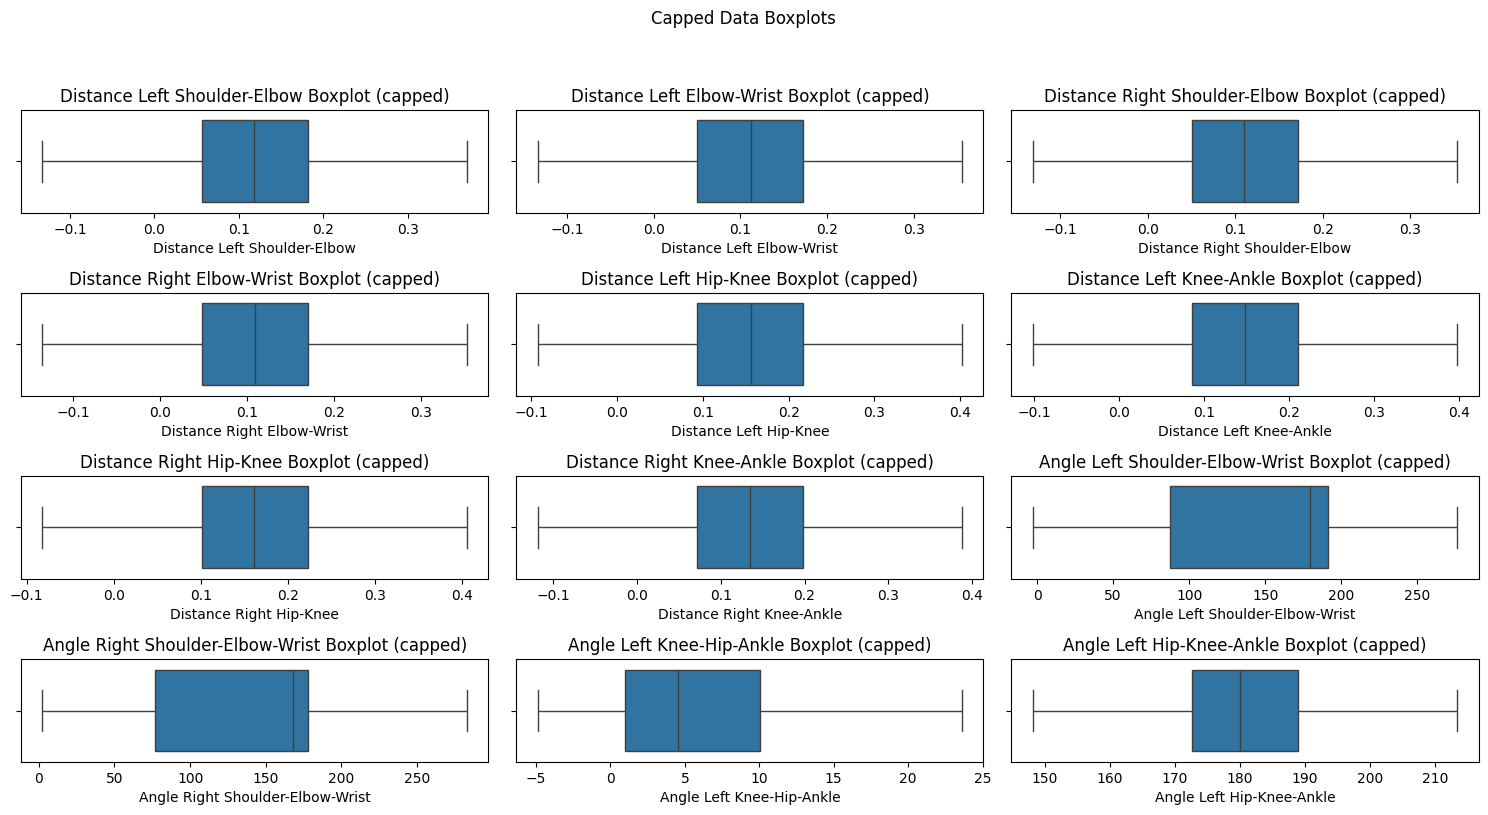

In [41]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(len(features)//3 + 1, 3, i+1)
    sns.boxplot(x=capped_data[feature])
    plt.title(f'{feature} Boxplot (capped)')
plt.suptitle('Capped Data Boxplots')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [43]:
data_cleaned.head()

,Distance Left Shoulder-Elbow,Distance Left Elbow-Wrist,Distance Right Shoulder-Elbow,Distance Right Elbow-Wrist,Distance Left Hip-Knee,Distance Left Knee-Ankle,Distance Right Hip-Knee,Distance Right Knee-Ankle,Angle Left Shoulder-Elbow-Wrist,Angle Right Shoulder-Elbow-Wrist,Angle Left Knee-Hip-Ankle,Angle Left Hip-Knee-Ankle,Exercise
0,0.228106,0.112399,0.204039,0.056744,0.225248,0.142753,0.153379,0.237899,46.661239,72.039809,6.709167,185.287451,squats
1,-0.041468,-0.006069,-0.048687,-0.036719,0.098488,0.055254,0.046888,0.018800,50.482895,65.008601,6.959905,191.399785,squats
2,0.009509,0.003367,0.077767,0.097515,0.110491,0.056230,0.066672,-0.078631,40.317657,42.871467,5.903028,192.926735,squats
3,0.185474,0.214602,0.115575,0.172455,0.342495,0.230047,0.263090,0.256526,39.702016,37.959219,-1.387479,177.092370,squats
4,0.090707,0.127767,0.039531,0.021273,0.209819,0.077951,0.192979,0.144604,138.063124,57.280488,2.617104,178.873633,squats


In [44]:
from sklearn.preprocessing import LabelEncoder

exercise_labels = data_cleaned['Exercise']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(exercise_labels)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

# Replace 'Exercise' column in your dataset with encoded labels
data_cleaned['Exercise'] = encoded_labels

Label Mapping:
{'jumping_jacks': 0, 'lunges': 1, 'pull_ups': 2, 'push_ups': 3, 'squats': 4}


In [46]:
data_cleaned.head(2)

,Distance Left Shoulder-Elbow,Distance Left Elbow-Wrist,Distance Right Shoulder-Elbow,Distance Right Elbow-Wrist,Distance Left Hip-Knee,Distance Left Knee-Ankle,Distance Right Hip-Knee,Distance Right Knee-Ankle,Angle Left Shoulder-Elbow-Wrist,Angle Right Shoulder-Elbow-Wrist,Angle Left Knee-Hip-Ankle,Angle Left Hip-Knee-Ankle,Exercise
0,0.228106,0.112399,0.204039,0.056744,0.225248,0.142753,0.153379,0.237899,46.661239,72.039809,6.709167,185.287451,4
1,-0.041468,-0.006069,-0.048687,-0.036719,0.098488,0.055254,0.046888,0.018800,50.482895,65.008601,6.959905,191.399785,4


##Model Training

In [67]:
from sklearn.metrics import classification_report


In [63]:
from sklearn.model_selection import train_test_split

X = capped_data.drop(columns=['Exercise'])  # Features
y = capped_data['Exercise']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8411428571428572


##Hypertuning the model

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the specified parameters and cross-validation strategy
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.8384312282853056
               precision    recall  f1-score   support

jumping_jacks       0.70      0.81      0.75       166
       lunges       0.92      0.92      0.92       218
     pull_ups       0.83      0.75      0.79       234
     push_ups       0.89      0.89      0.89       114
       squats       0.90      0.90      0.90       143

     accuracy                           0.84       875
    macro avg       0.85      0.85      0.85       875
 weighted avg       0.85      0.84      0.85       875



In [69]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[135   3  24   1   3]
 [  9 200   4   3   2]
 [ 44   3 175   3   9]
 [  3   7   2 101   1]
 [  1   4   5   5 128]]
Classification Report:
               precision    recall  f1-score   support

jumping_jacks       0.70      0.81      0.75       166
       lunges       0.92      0.92      0.92       218
     pull_ups       0.83      0.75      0.79       234
     push_ups       0.89      0.89      0.89       114
       squats       0.90      0.90      0.90       143

     accuracy                           0.84       875
    macro avg       0.85      0.85      0.85       875
 weighted avg       0.85      0.84      0.85       875



In [73]:
import joblib
model = joblib.load('/content/fitness_tracker_model.pkl')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


Confusion Matrix:
[[126   2  32   2   4]
 [  3 202   9   2   2]
 [ 41   6 175   4   8]
 [  5  10   3  95   1]
 [  1   8   7   5 122]]
Classification Report:
               precision    recall  f1-score   support

jumping_jacks       0.72      0.76      0.74       166
       lunges       0.89      0.93      0.91       218
     pull_ups       0.77      0.75      0.76       234
     push_ups       0.88      0.83      0.86       114
       squats       0.89      0.85      0.87       143

     accuracy                           0.82       875
    macro avg       0.83      0.82      0.83       875
 weighted avg       0.82      0.82      0.82       875



In [116]:
import joblib
joblib.dump(best_rf, 'fitness_tracker_model.pkl')

['model.pkl']

###Testing the model for new input video

In [72]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [71]:
import joblib
best_rf = joblib.load('/content/fitness_tracker_model.pkl')